In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Load dataset
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Train the baseline Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Baseline Model (No PCA) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


Baseline Model (No PCA) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [4]:
from sklearn.decomposition import PCA

def apply_pca(n_components, X_train, X_test):
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca


In [5]:
components_list = [2, 5, 10]  # Number of PCA components to retain
results = []

for n_components in components_list:
    # Apply PCA and get transformed datasets
    X_train_pca, X_test_pca = apply_pca(n_components, X_train, X_test)

    # Train the Logistic Regression model
    pca_model = LogisticRegression(max_iter=1000)
    pca_model.fit(X_train_pca, y_train)

    # Predictions on the test set
    y_pred_pca = pca_model.predict(X_test_pca)

    # Evaluate performance
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
    recall_pca = recall_score(y_test, y_pred_pca, average='weighted')

    results.append((n_components, accuracy_pca, precision_pca, recall_pca))

# Print results
for n_components, accuracy, precision, recall in results:
    print(f'PCA Model ({n_components} components) - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}')


PCA Model (2 components) - Accuracy: 0.6852, Precision: 0.6653, Recall: 0.6852
PCA Model (5 components) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000
PCA Model (10 components) - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000


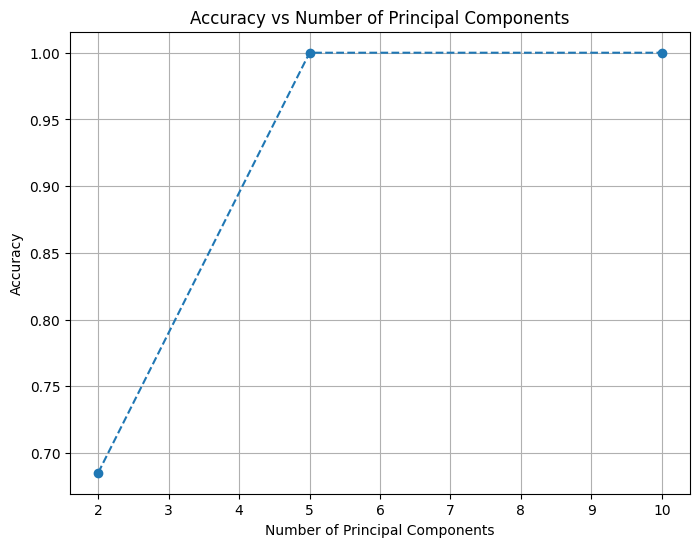

In [6]:
import matplotlib.pyplot as plt

# Extract accuracy values for plotting
n_components_vals = [r[0] for r in results]
accuracy_vals = [r[1] for r in results]

# Plot accuracy vs number of components
plt.figure(figsize=(8, 6))
plt.plot(n_components_vals, accuracy_vals, marker='o', linestyle='--')
plt.title('Accuracy vs Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
